In [1]:
# Importing the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings as w
w.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
# displaying dataset 
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# (number of rows, number of columns)
dataset.shape

(200, 5)

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# finding any null values in data
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Finding the number of males and females in the data
dataset.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# K means Clustering 

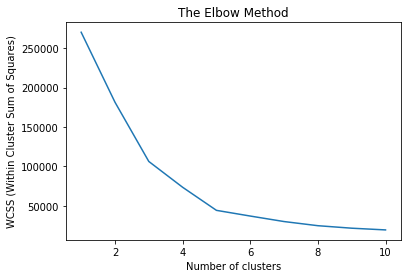

In [8]:
# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [9]:
# Fitting K-Means to the dataset.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
# it tells which data point belongs to which cluster (0,1,2,3,4)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

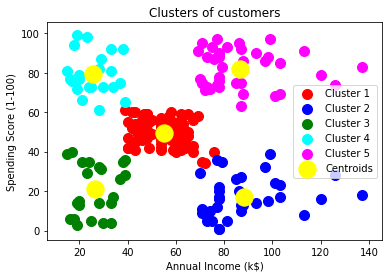

In [11]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

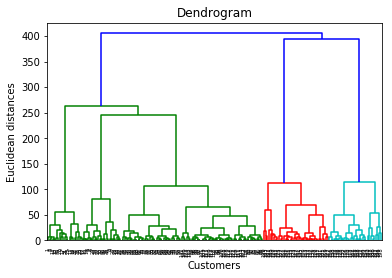

In [12]:
# Using the dendrogram to find the optimal number of clusters...
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

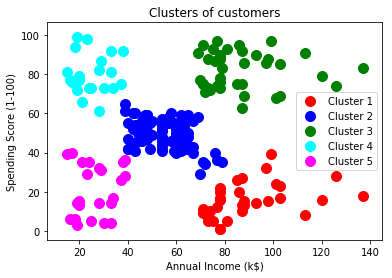

In [14]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h4>So, The Clusters formed by both algorithms are same...</h4>

# Analysis of Clusters

In [15]:
# Some Preprocessing for analysis
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
dataset = dataset.drop('CustomerID', axis=1)

In [17]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(dataset.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [20]:
dataset['Gender'] = encoded_sex

In [21]:
#Finding clusters
from kmeans_numpy_improved import *
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(dataset.values)


In [22]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Cluster 1 Customers Analysis

In [23]:
cluster_1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,23,70,29
1,1,43,71,35
2,1,59,71,11
3,1,47,71,9
4,0,25,72,34
5,1,20,73,5
6,0,44,73,7
7,1,19,74,10
8,0,57,75,5
9,0,28,76,40


In [25]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Gender'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Gender'] == 0.0)].shape[0]))

Average age for customers in cluster one: 40.39473684210526
Average annual income (in thousends) for customers in cluster one: 87.0
Deviation of the mean for annual income (in thousends) for customers in cluster one: 16.055823668819066
In cluster one we have: 38 customers
From those customers we have 20 male and 18 female


# Cluster 2 Customers Analysis

In [26]:
cluster_2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,20,16,6
1,0,35,18,6
2,1,64,19,3
3,1,67,19,14
4,0,58,20,15
5,1,37,20,13
6,0,35,21,35
7,1,52,23,29
8,1,35,24,35
9,0,46,25,5


In [27]:
print("Average age for customers in cluster two: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster two: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster two: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster two we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Gender'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Gender'] == 0.0)].shape[0]))

Average age for customers in cluster two: 52.05797101449275
Average annual income (in thousends) for customers in cluster two: 46.42028985507246
Deviation of the mean for annual income (in thousends) for customers in cluster two: 14.825952370222293
In cluster two we have: 69 customers
From those customers we have 28 male and 41 female


# Cluster 3 Customers Analysis

In [28]:
cluster_3

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,23,16,77
3,0,31,17,40
4,0,22,17,76
5,0,23,18,94
6,0,30,19,72
7,0,35,19,99
8,0,24,20,77
9,1,22,20,79


In [29]:
print("Average age for customers in cluster three: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster three: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster three: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster three we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Gender'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Gender'] == 0.0)].shape[0]))

Average age for customers in cluster three: 25.01923076923077
Average annual income (in thousends) for customers in cluster three: 40.23076923076923
Deviation of the mean for annual income (in thousends) for customers in cluster three: 16.36085311934862
In cluster three we have: 52 customers
From those customers we have 21 male and 31 female


# Cluster 4 Customers Analysis

In [30]:
cluster_4

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,32,97,86
1,0,29,98,88
2,1,30,99,97
3,1,28,101,68
4,0,36,103,85
5,0,32,103,69
6,0,38,113,91
7,0,35,120,79
8,1,32,126,74
9,1,30,137,83


In [31]:
print("Average age for customers in cluster four: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster four: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster four: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster four we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Gender'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Gender'] == 0.0)].shape[0]))


Average age for customers in cluster four: 32.2
Average annual income (in thousends) for customers in cluster four: 109.7
Deviation of the mean for annual income (in thousends) for customers in cluster four: 13.061776295741709
In cluster four we have: 10 customers
From those customers we have 4 male and 6 female


# Cluster 5 Customers Analysis

In [32]:
cluster_5

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,27,67,56
1,0,40,69,58
2,1,39,69,91
3,0,31,70,77
4,1,40,71,95
5,1,38,71,75
6,1,39,71,75
7,0,31,72,71
8,0,29,73,88
9,1,32,73,73


In [33]:
print("Average age for customers in cluster five: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster five: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster five: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster five we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Gender'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Gender'] == 0.0)].shape[0]))

Average age for customers in cluster five: 32.903225806451616
Average annual income (in thousends) for customers in cluster five: 77.87096774193549
Deviation of the mean for annual income (in thousends) for customers in cluster five: 6.7237755114215165
In cluster five we have: 31 customers
From those customers we have 15 male and 16 female
